,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Decision Tree test accuracy: 0.9853658536585366


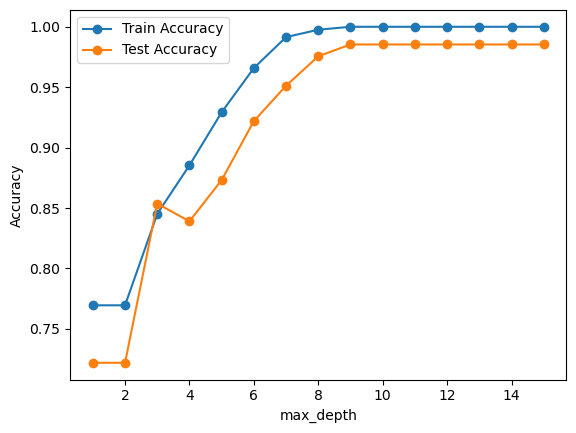

Random Forest test accuracy: 1.0
Top features:
 cp          0.144796
thalach     0.118097
ca          0.110965
oldpeak     0.105590
thal        0.101825
age         0.091826
chol        0.076579
exang       0.074189
trestbps    0.071178
slope       0.045234
dtype: float64
DT CV mean: 0.8302439024390245 RF CV mean: 0.9960975609756098
 Made by Bond69k the pussy blaster


In [4]:

# --- Load libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Load data ---
df = pd.read_csv(r"C:\Users\LEGION\Downloads\archive\heart.csv")
display(df.head())

# --- Preprocess ---
if 'target' in df.columns:
    target_col = 'target'
else:
    target_col = df.columns[-1]

X = df.drop(columns=[target_col])
y = df[target_col]
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    X = pd.get_dummies(X, columns=non_numeric, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree test accuracy:", accuracy_score(y_test, y_pred_dt))

# --- Overfitting analysis ---
depths = list(range(1, 16))
train_acc = []
test_acc = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))

plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest test accuracy:", accuracy_score(y_test, y_pred_rf))

# --- Feature importances ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features:\n", importances.head(10))

# --- Cross-validation ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), scaler.transform(X), y, cv=skf)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), scaler.transform(X), y, cv=skf)
print("DT CV mean:", dt_cv_scores.mean(), "RF CV mean:", rf_cv_scores.mean())

